In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# Basic Explanation
* It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

* In this database, you have 3 different outputs:

* No readmission;
* 1.A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
* A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.
* In this context, you can see different objective functions for the problem. You can try to figure out situations where the patient will not be readmitted, or if their are going to be readmitted in less than 30 days (because the problem can the the treatment), etc… Make your choice and let's help them creating new approaches for the problem.




#### To understand the description of each column, visit this site https://www.hindawi.com/journals/bmri/2014/781670/tab1/
#### This is a Kaggle dataset, and here is the link https://www.kaggle.com/brandao/diabetes



#### Data Set Description
#### VARIABLE NAMES: DESCRIPTION

* **Encounter ID:** Unique identifier of an encounter
* **Patient number:** Unique identifier of a patient
* **Race Values:** Caucasian, Asian, African American, Hispanic, and other
* **Gender Values:** male, female, and unknown/invalid
* **Age Grouped in 10-year intervals:** 0, 10), 10, 20), …, 90, 100)
* **Weight:** Weight in pounds
* **Admission type:** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition:** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source:** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital:** Integer number of days between admission and discharge
* **Payer code:** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures:** Number of lab tests performed during the encounter
* **Number of procedures:** Numeric Number of procedures (other than lab tests) performed during the encounter
* **Number of medications:** Number of distinct generic names administered during the encounter
* **Number of outpatient visits:** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits:** Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits:** Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses:** Number of diagnoses entered to the system 0%
* **Glucose serum test result:** Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result:** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications:** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* **24 features for medications:** For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted: Days to inpatient readmission. Values:** “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### Reading the data

In [3]:
data = pd.read_csv('diabetic_data.csv')
data.replace('?',np.nan,inplace=True)

#### Understanding the structure and the columns 

In [4]:
data.shape

(101766, 50)

In [5]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [6]:
round(data.isna().mean().sort_values(ascending = False).head(10)*100,2)

weight               96.86
medical_specialty    49.08
payer_code           39.56
race                  2.23
diag_3                1.40
diag_2                0.35
diag_1                0.02
num_procedures        0.00
max_glu_serum         0.00
number_diagnoses      0.00
dtype: float64

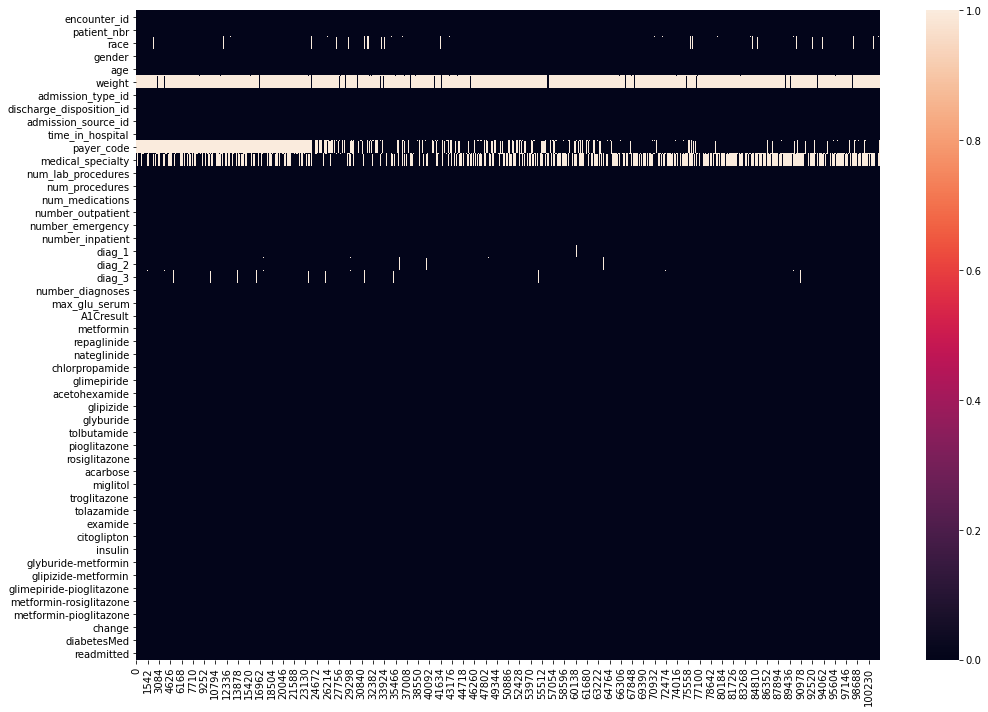

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull().T, cbar='rainbow')
plt.tight_layout()

In [8]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Data Visualization

In [9]:
def barplot(x, hue = None):
    plt.figure(figsize = (10,6))
    bar_plot1 = sns.countplot(x = x, data = data, hue = hue)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, 1.002*height,height, ha = 'center')
    plt.tight_layout()

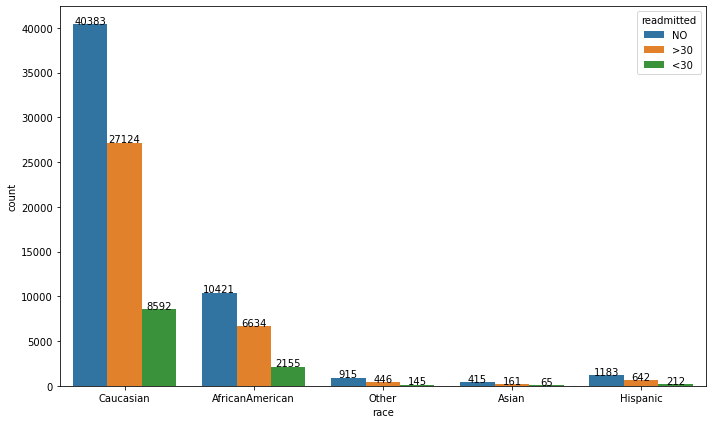

In [10]:
barplot('race', 'readmitted')
# Most of the data consists of race Causasian, white skin, and the readmission of every race are in almost same proportion

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


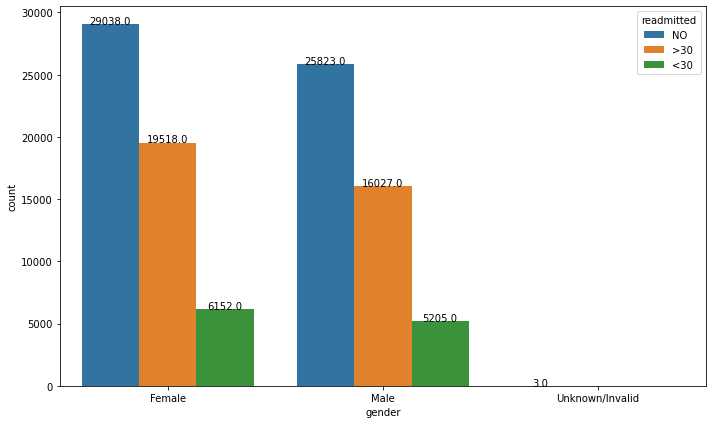

In [11]:
barplot('gender', 'readmitted')
# There is no class imbalance between male and female

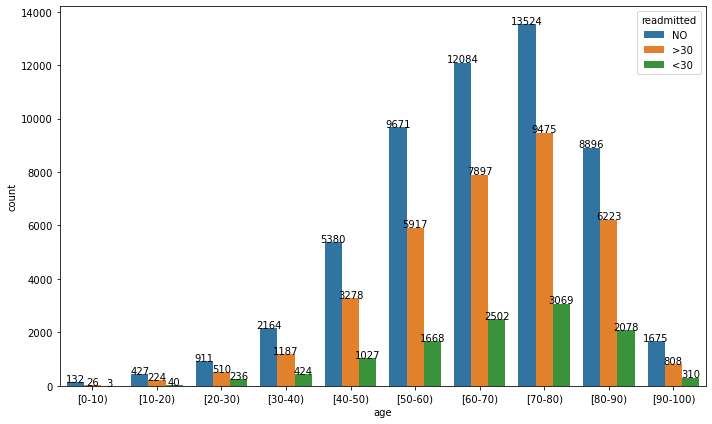

In [12]:
barplot('age', 'readmitted')
# Elder people more likely get admitted to hospital due to HbA1c

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


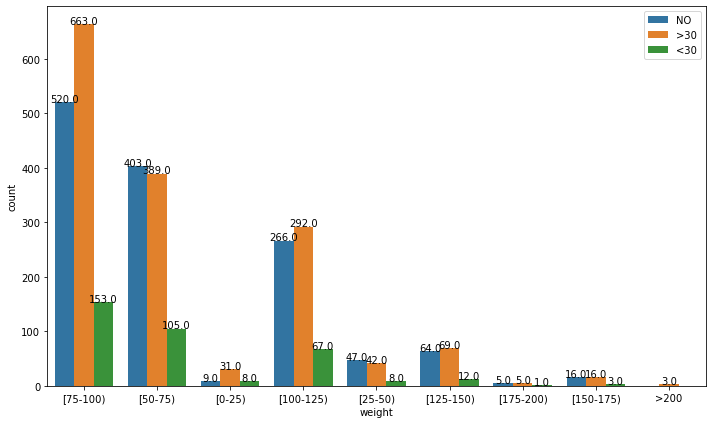

In [13]:
barplot('weight', 'readmitted')
plt.legend(loc = 1)
# Most of the data is missing

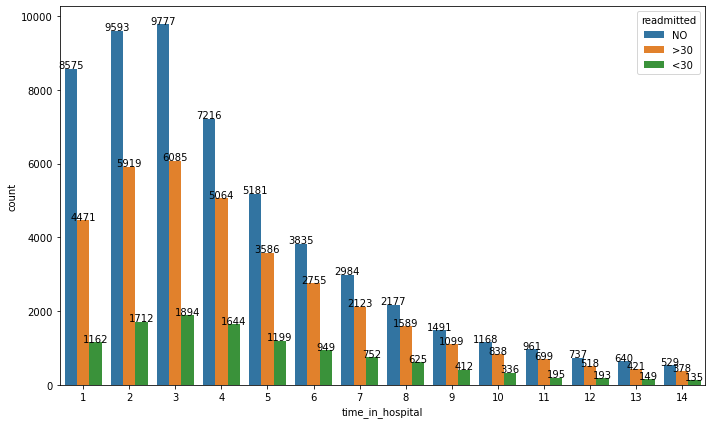

In [14]:
barplot('time_in_hospital','readmitted')
# Comparatively more number of people are admitted for a fewer days

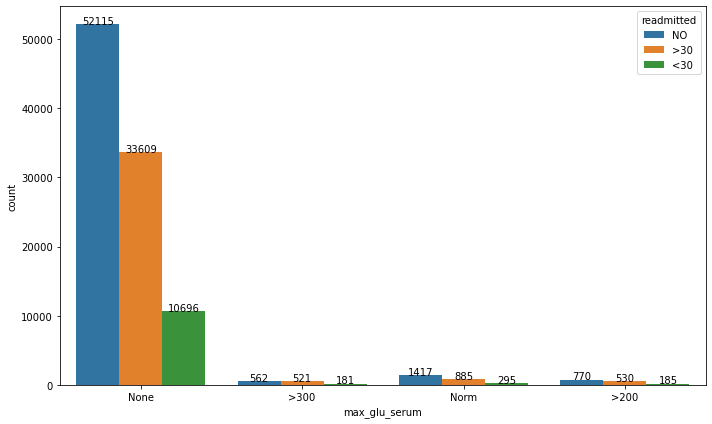

In [15]:
barplot('max_glu_serum', 'readmitted')
# For most of the patients, the glucose serum test is not conducted

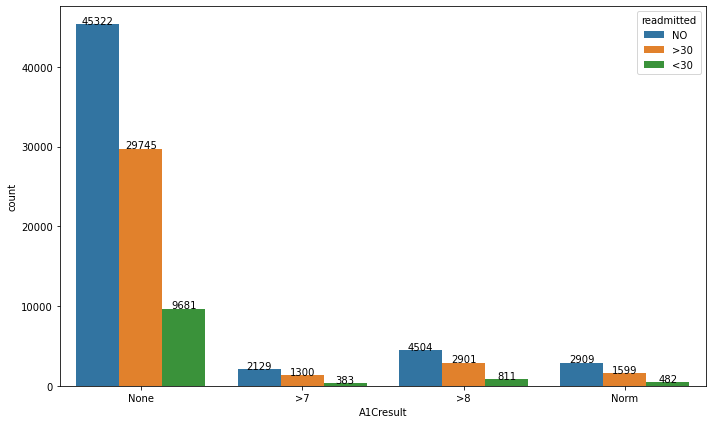

In [16]:
barplot('A1Cresult','readmitted')
# For most of  the patients, A1c test result was not measured

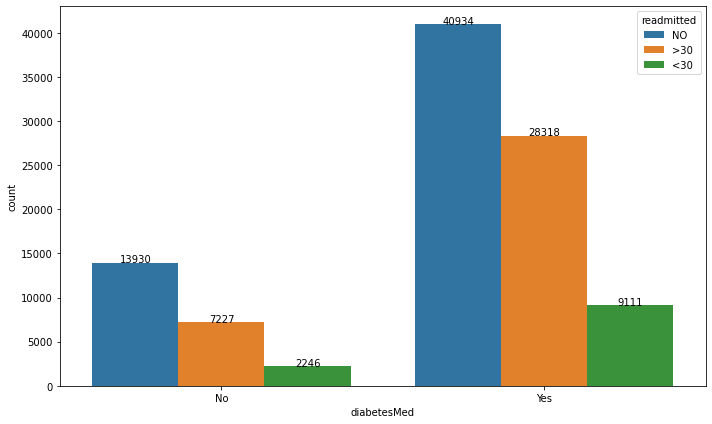

In [17]:
barplot('diabetesMed','readmitted')
# Diabetic meds are prescribed for most of the patients

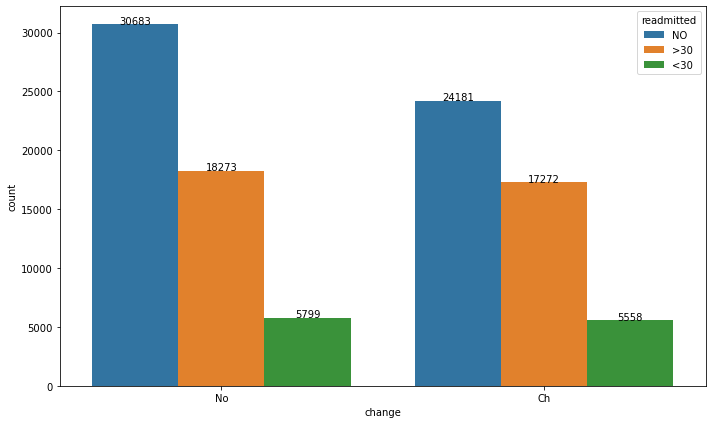

In [18]:
barplot('change', 'readmitted')
# There is no high variation in the readmission data whether the medication is changed or not

Removing those columns which have high NAs and also removing ID columns they won't be much useful in model building

In [19]:
# Removing columns which have high NAs
data.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1, inplace=True)

# Removing all ID columns
data.drop(['encounter_id','patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis = 1,  inplace=True)

# In gender there are three datapoints which have invalid gender, it's a very minimal data so remove them
data = data[data['gender'] != 'Unknown/Invalid']

In [20]:
round(sum(data.isna().sum())/data.shape[0] *100, 2)

4.0

<BarContainer object of 42 artists>

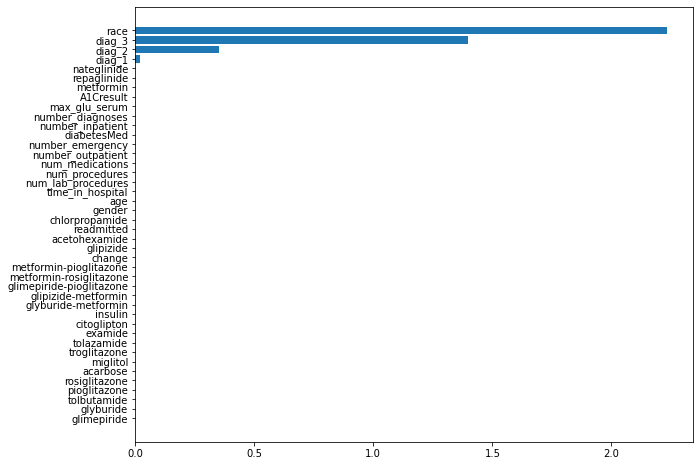

In [21]:
plt.figure(figsize=(10,8))
missing_data = pd.DataFrame({'column':data.columns ,'na_percent':data.isna().mean() *100})
missing_data.sort_values('na_percent',inplace=True)
plt.barh(y = missing_data['column'],width=missing_data['na_percent'])

In [22]:
data.dropna(inplace=True)

In [23]:
data.shape

(98052, 42)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   time_in_hospital          98052 non-null  int64 
 4   num_lab_procedures        98052 non-null  int64 
 5   num_procedures            98052 non-null  int64 
 6   num_medications           98052 non-null  int64 
 7   number_outpatient         98052 non-null  int64 
 8   number_emergency          98052 non-null  int64 
 9   number_inpatient          98052 non-null  int64 
 10  diag_1                    98052 non-null  object
 11  diag_2                    98052 non-null  object
 12  diag_3                    98052 non-null  object
 13  number_diagnoses          98052 non-null  int64 
 14  max_glu_serum        

### Label Encoding

In [25]:
# Few of the variables in diag columns has E and V at the start
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    data[col] = data[col].str.replace('E','-')
    data[col] = data[col].str.replace('V','-')
    
data[diag_cols] = data[diag_cols].astype(float)


# diagnosis grouping
for col in diag_cols:
    data['temp']=np.nan
    
    condition = ((data[col] >=250) & (data[col] < 251))
    data.loc[condition,'temp']='Diabetes'
    
    condition = (((data[col]>=390) & (data[col]<=458)) | (data[col]==785))
    data.loc[condition,'temp']='Circulatory'
    
    condition = (((data[col]>=460) & (data[col]<=519)) | (data[col]==786))
    data.loc[condition,'temp']='Respiratory'
    
    condition = (((data[col]>=520) & (data[col]<=579)) | (data[col]==787))
    data.loc[condition,'temp']='Digestive'
    
    condition = (((data[col]>=580) & (data[col]<=629)) | (data[col]==788))
    data.loc[condition,'temp']='Genitourinary'
    
    condition = ((data[col]>=800) & (data[col]<=999))
    data.loc[condition,'temp']='Injury'
    
    condition = ((data[col]>=710) & (data[col]<=739))
    data.loc[condition,'temp']='Muscoloskeletal'
    
    condition = ((data[col]>=140) & (data[col]<=239))
    data.loc[condition,'temp']='Neoplasms'
    
 
    data['temp']=data['temp'].fillna('Others')
    
    data[col]=data['temp']
data.drop('temp',axis=1,inplace=True)

In [26]:
age_dict = {'[0-10)' : 1,
            '[10-20)' : 1,
            '[20-30)' : 2,
            '[30-40)' : 2,
            '[40-50)' : 3,
            '[50-60)' : 3,
            '[60-70)' : 4,
            '[70-80)' : 4,
            '[80-90)' : 5,
            '[90-100)': 5}

data['age'] = data['age'].replace(age_dict)


In [27]:
drug_cols = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for x in drug_cols:
    print('------------------------')
    print('\n')
    print(x)
    print(data[x].value_counts())

------------------------


metformin
No        78807
Steady    17677
Up         1017
Down        551
Name: metformin, dtype: int64
------------------------


repaglinide
No        96529
Steady     1371
Up          107
Down         45
Name: repaglinide, dtype: int64
------------------------


nateglinide
No        97361
Steady      657
Up           23
Down         11
Name: nateglinide, dtype: int64
------------------------


chlorpropamide
No        97969
Steady       76
Up            6
Down          1
Name: chlorpropamide, dtype: int64
------------------------


glimepiride
No        93065
Steady     4488
Up          315
Down        184
Name: glimepiride, dtype: int64
------------------------


acetohexamide
No        98051
Steady        1
Name: acetohexamide, dtype: int64
------------------------


glipizide
No        85769
Steady    10990
Up          752
Down        541
Name: glipizide, dtype: int64
------------------------


glyburide
No        87791
Steady     8932
Up          791


In [28]:
# Removing those which has almost zero variance
data.drop(['acetohexamide','tolbutamide','miglitol','troglitazone','tolazamide','examide','citoglipton', 'glipizide-metformin',
          'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], axis = 1, inplace = True)

In [29]:
data.dtypes

race                   object
gender                 object
age                     int64
time_in_hospital        int64
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
number_diagnoses        int64
max_glu_serum          object
A1Cresult              object
metformin              object
repaglinide            object
nateglinide            object
chlorpropamide         object
glimepiride            object
glipizide              object
glyburide              object
pioglitazone           object
rosiglitazone          object
acarbose               object
insulin                object
glyburide-metformin    object
change                 object
diabetesMed            object
readmitted             object
dtype: object

In [30]:
cat_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3','max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
       'readmitted']

data[cat_cols] = data[cat_cols].astype('category')

In [31]:
data.dtypes

race                   category
gender                 category
age                    category
time_in_hospital          int64
num_lab_procedures        int64
num_procedures            int64
num_medications           int64
number_outpatient         int64
number_emergency          int64
number_inpatient          int64
diag_1                 category
diag_2                 category
diag_3                 category
number_diagnoses          int64
max_glu_serum          category
A1Cresult              category
metformin              category
repaglinide            category
nateglinide            category
chlorpropamide         category
glimepiride            category
glipizide              category
glyburide              category
pioglitazone           category
rosiglitazone          category
acarbose               category
insulin                category
glyburide-metformin    category
change                 category
diabetesMed            category
readmitted             category
dtype: o

In [32]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm

In [33]:
cat_cols = data.select_dtypes('category').columns
cat_cols

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Checking the dependency of the target on the features

In [34]:
def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [35]:
for col in cat_cols:
    find_chi2_independence(col, 'readmitted', data)

---------------readmitted Vs race Chi Square Test of Independence -------------------

 Contingency table :

[[ 2140    65  8512   207   142]
 [ 6543   159 26874   633   440]
 [10198   401 39693  1144   901]]

 Expected table :

[[ 2130.88102231    70.53655203  8473.30206421   223.91123078
    167.36913067]
 [ 6672.04920858   220.85857504 26530.9455289    701.09346061
    524.05322686]
 [10078.0697691    333.60487292 40074.75240689  1058.99530861
    791.57764248]]
The p value returned = 3.2699985670374004e-16 and degrees of freedom returned = 8
significance(alpha) = 0.050
Dependent (reject H0)
---------------readmitted Vs gender Chi Square Test of Independence -------------------

 Contingency table :

[[ 6002  5064]
 [19060 15589]
 [27771 24566]]

 Expected table :

[[ 5962.65224575  5103.34775425]
 [18669.79375229 15979.20624771]
 [28200.55400196 24136.44599804]]
The p value returned = 9.05403281880493e-08 and degrees of freedom returned = 2
significance(alpha) = 0.050
Dependent (re

---------------readmitted Vs acarbose Chi Square Test of Independence -------------------

 Contingency table :

[[    1 11039    24     2]
 [    1 34497   147     4]
 [    1 52217   115     4]]

 Expected table :

[[3.38575450e-01 1.10322553e+04 3.22775262e+01 1.12858483e+00]
 [1.06012116e+00 3.45433413e+04 1.01064884e+02 3.53373720e+00]
 [1.60130339e+00 5.21774034e+04 1.52657590e+02 5.33767797e+00]]
The p value returned = 4.353097168154253e-06 and degrees of freedom returned = 6
significance(alpha) = 0.050
Dependent (reject H0)
---------------readmitted Vs insulin Chi Square Test of Independence -------------------

 Contingency table :

[[ 1661  4658  3313  1434]
 [ 4632 15640 10155  4222]
 [ 5550 25644 15900  5243]]

 Expected table :

[[ 1336.58301717  5184.94443765  3314.4279362   1230.04460898]
 [ 4185.00496675 16234.69544731 10377.87941092  3851.42017501]
 [ 6321.41201607 24522.36011504 15675.69265288  5817.53521601]]
The p value returned = 8.213406350204559e-101 and degrees of

In [36]:
data.drop(['nateglinide', 'chlorpropamide', 'glyburide', 'glyburide-metformin'], axis = 1, inplace = True)

In [37]:
data.shape

(98052, 27)

In [38]:
data.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [39]:
import statsmodels.discrete.discrete_model as lgm

In [40]:
readmit_dict = {'NO' : 0,
                '>30' : 0,
                '<30' : 1}

data['readmitted'] = data['readmitted'].replace(readmit_dict)


In [41]:
#data['readmitted'] = data['readmitted'].astype('category')

In [42]:
num_cols = list(data.select_dtypes('int64').columns)
print(num_cols)

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


* This shows that all the numerical variables are individually significant

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[num_cols].values, i) for i in range(data[num_cols].shape[1])]
vif["features"] = data[num_cols].columns
vif

,VIF Factor,features
0,4.341176,time_in_hospital
1,6.024442,num_lab_procedures
2,1.928965,num_procedures
3,7.424207,num_medications
4,1.114402,number_outpatient
5,1.134192,number_emergency
6,1.421691,number_inpatient
7,7.684591,number_diagnoses
8,1.159935,readmitted


In [44]:
max_glu_dict = {'None' : 0,
               'Norm' : 1,
               '>200' : -1,
                '>300' :-2
               }
data['max_glu_serum'] = data['max_glu_serum'].replace(max_glu_dict)

In [45]:
A1C_dict = {'None' : 0,
            'Norm' : 1,
            '>7' : -1,
            '>8' : -2
           }
data['A1Cresult'] = data['A1Cresult'].replace(A1C_dict)

In [46]:
drug_new_cols = ['metformin',
       'repaglinide', 'glimepiride',
       'glipizide',  'pioglitazone', 'rosiglitazone', 'acarbose',
       'insulin']

drug_dict = { 'No': 0,
             'Steady' : 1,
             'Down' : -1,
             'Up' : 2}

data[drug_new_cols] = data[drug_new_cols].replace(drug_dict)

In [47]:
change_dict = {'No' : 0,
               'Ch' : 1}

data['change'] = data['change'].replace(change_dict)

In [48]:
diabet_dict = {'No' : 0,
               'Yes' : 1
              }

data['diabetesMed'] = data['diabetesMed'].replace(diabet_dict)

In [49]:
data['race'].unique()

['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']

In [50]:
race_dict = { 'Caucasian': 0,
                'AfricanAmerican' : 1,
                'Asian' : 2,
                'Hispanic' : 3,
                 'Other' : 4
            }

data['race'] = data['race'].replace(race_dict)

In [51]:
gender_dict = { 'Female' : 0,
               'Male': 1}

data['gender'] = data['gender'].replace(gender_dict)

In [52]:
data.diag_1.value_counts()

Circulatory        29536
Others             17634
Respiratory        13993
Digestive           9187
Diabetes            7965
Injury              6703
Genitourinary       4983
Muscoloskeletal     4739
Neoplasms           3312
Name: diag_1, dtype: int64

In [53]:
diag_dict = {'Circulatory' :0,
             'Respiratory' : 1,
             'Digestive' : 2,
             'Diabetes' : 3,
             'Injury' : 4,
             'Genitourinary' : 5,
             'Muscoloskeletal' : 6,
             'Neoplasms' : 7,
             'Others' : 8}

data[['diag_1', 'diag_2', 'diag_3']] = data[['diag_1', 'diag_2', 'diag_3']].replace(diag_dict)

In [54]:
pd.set_option('max_columns',None)
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
1,0,0,1,3,59,0,18,0,0,0,8,3,8,9,0,0,0,0,0,0,0,0,0,2,1,1,0
2,1,0,2,2,11,5,13,2,0,1,8,3,8,6,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,2,2,44,1,16,0,0,0,8,3,0,7,0,0,0,0,0,0,0,0,0,2,1,1,0
4,0,1,3,1,51,0,8,0,0,0,7,7,3,5,0,0,0,0,0,1,0,0,0,1,1,1,0
5,0,1,3,3,31,6,16,0,0,0,0,0,3,9,0,0,0,0,0,0,0,0,0,1,0,1,0


In [55]:
cat_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3','max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride',
       'glipizide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'insulin', 'change', 'diabetesMed',
       'readmitted']

data[cat_cols] = data[cat_cols].astype('category')

In [56]:
data.dtypes

race                  category
gender                category
age                   category
time_in_hospital         int64
num_lab_procedures       int64
num_procedures           int64
num_medications          int64
number_outpatient        int64
number_emergency         int64
number_inpatient         int64
diag_1                category
diag_2                category
diag_3                category
number_diagnoses         int64
max_glu_serum         category
A1Cresult             category
metformin             category
repaglinide           category
glimepiride           category
glipizide             category
pioglitazone          category
rosiglitazone         category
acarbose              category
insulin               category
change                category
diabetesMed           category
readmitted            category
dtype: object

In [57]:
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
1,0,0,1,3,59,0,18,0,0,0,8,3,8,9,0,0,0,0,0,0,0,0,0,2,1,1,0
2,1,0,2,2,11,5,13,2,0,1,8,3,8,6,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,2,2,44,1,16,0,0,0,8,3,0,7,0,0,0,0,0,0,0,0,0,2,1,1,0
4,0,1,3,1,51,0,8,0,0,0,7,7,3,5,0,0,0,0,0,1,0,0,0,1,1,1,0
5,0,1,3,3,31,6,16,0,0,0,0,0,3,9,0,0,0,0,0,0,0,0,0,1,0,1,0


In [58]:
def histo_plot(x,data):
    data[x].hist(bins = 10)

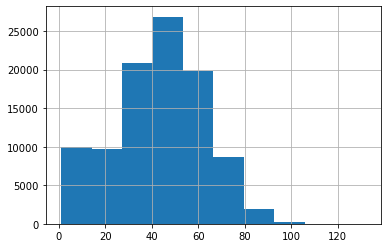

In [59]:
histo_plot('num_lab_procedures',data)

In [60]:
data.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [61]:
data.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
1,0,0,1,3,59,0,18,0,0,0,8,3,8,9,0,0,0,0,0,0,0,0,0,2,1,1,0
2,1,0,2,2,11,5,13,2,0,1,8,3,8,6,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,2,2,44,1,16,0,0,0,8,3,0,7,0,0,0,0,0,0,0,0,0,2,1,1,0
4,0,1,3,1,51,0,8,0,0,0,7,7,3,5,0,0,0,0,0,1,0,0,0,1,1,1,0
5,0,1,3,3,31,6,16,0,0,0,0,0,3,9,0,0,0,0,0,0,0,0,0,1,0,1,0


In [62]:
from sklearn.feature_selection import f_classif

In [63]:
num_cols = data.select_dtypes(['int64','float64']).columns

In [64]:
x = f_classif(data[num_cols],data['readmitted'])

In [65]:
x = pd.DataFrame(x).T

In [66]:
x

,0,1
0,185.017732,4.248086e-42
1,38.850302,4.594371e-10
2,15.248803,9.429954e-05
3,140.100085,2.662873e-32
4,33.236579,8.184481e-09
5,360.892506,2.511366e-80
6,2703.614127,0.000000e+00
7,212.383437,4.658282e-48


In [67]:
x.rename(columns = {0:'F_statistic',1:'p-values'}, inplace = True)

In [68]:
x['p-values'] > 0.05

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: p-values, dtype: bool

In [69]:
data.dtypes

race                  category
gender                category
age                   category
time_in_hospital         int64
num_lab_procedures       int64
num_procedures           int64
num_medications          int64
number_outpatient        int64
number_emergency         int64
number_inpatient         int64
diag_1                category
diag_2                category
diag_3                category
number_diagnoses         int64
max_glu_serum         category
A1Cresult             category
metformin             category
repaglinide           category
glimepiride           category
glipizide             category
pioglitazone          category
rosiglitazone         category
acarbose              category
insulin               category
change                category
diabetesMed           category
readmitted            category
dtype: object

## Splitting the data into train and test

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedShuffleSplit

from xgboost import XGBClassifier

# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [71]:
y=data[["readmitted"]]
X=data.drop('readmitted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=200, stratify=y)

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=340, stratify=y_train)

In [73]:
ohe = OneHotEncoder(handle_unknown='error')

ohe.fit(y_train)

columns_ohe = list(ohe.get_feature_names(y_train.columns))
print(columns_ohe)

y_train_ohe = ohe.transform(y_train)
y_val_ohe = ohe.transform(y_val)
y_test_ohe = ohe.transform(y_test)

['readmitted_0', 'readmitted_1']


In [74]:
y_train_ohe = pd.DataFrame(y_train_ohe.todense(), columns=columns_ohe)
y_val_ohe = pd.DataFrame(y_val_ohe.todense(), columns=columns_ohe)
y_test_ohe = pd.DataFrame(y_test_ohe.todense(), columns=columns_ohe)

In [75]:
y_train_ohe = y_train_ohe.values
y_val_ohe = y_val_ohe.values
y_test_ohe = y_test_ohe.values

In [76]:
print(X_train.shape)
print(y_train_ohe.shape)
print(X_val.shape)
print(y_val_ohe.shape)
print(X_test.shape)
print(y_test_ohe.shape)

(70596, 26)
(70596, 2)
(17650, 26)
(17650, 2)
(9806, 26)
(9806, 2)


In [77]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [78]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'change',
       'diabetesMed'],
      dtype='object')

In [79]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_val[num_attr] = imputer.transform(X_val[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

In [80]:
X_train.dtypes

race                  category
gender                category
age                   category
time_in_hospital       float64
num_lab_procedures     float64
num_procedures         float64
num_medications        float64
number_outpatient      float64
number_emergency       float64
number_inpatient       float64
diag_1                category
diag_2                category
diag_3                category
number_diagnoses       float64
max_glu_serum         category
A1Cresult             category
metformin             category
repaglinide           category
glimepiride           category
glipizide             category
pioglitazone          category
rosiglitazone         category
acarbose              category
insulin               category
change                category
diabetesMed           category
dtype: object

In [81]:
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer.transform(X_train[cat_attr])
X_val[cat_attr] = imputer.transform(X_val[cat_attr])
X_test[cat_attr] = imputer.transform(X_test[cat_attr])

In [82]:
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr] +
  [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_attr]
, df_out=True)

In [83]:
mapper.fit(X_train)

X_train_final = mapper.transform(X_train)
X_val_final = mapper.transform(X_val)
X_test_final = mapper.transform(X_test)

In [84]:
X_train_final.shape

(70596, 91)

In [85]:
X_train_final.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_x0_0', 'race_x0_1',
       'race_x0_2', 'race_x0_3', 'race_x0_4', 'gender_x0_0', 'gender_x0_1',
       'age_x0_1', 'age_x0_2', 'age_x0_3', 'age_x0_4', 'age_x0_5',
       'diag_1_x0_0', 'diag_1_x0_1', 'diag_1_x0_2', 'diag_1_x0_3',
       'diag_1_x0_4', 'diag_1_x0_5', 'diag_1_x0_6', 'diag_1_x0_7',
       'diag_1_x0_8', 'diag_2_x0_0', 'diag_2_x0_1', 'diag_2_x0_2',
       'diag_2_x0_3', 'diag_2_x0_4', 'diag_2_x0_5', 'diag_2_x0_6',
       'diag_2_x0_7', 'diag_2_x0_8', 'diag_3_x0_0', 'diag_3_x0_1',
       'diag_3_x0_2', 'diag_3_x0_3', 'diag_3_x0_4', 'diag_3_x0_5',
       'diag_3_x0_6', 'diag_3_x0_7', 'diag_3_x0_8', 'max_glu_serum_x0_-2',
       'max_glu_serum_x0_-1', 'max_glu_serum_x0_0', 'max_glu_serum_x0_1',
       'A1Cresult_x0_-2', 'A1Cresult_x0_-1', 'A1Cresult_x0_0',
       'A1Cresult_x0_1', 'metformin_

In [86]:
scores = pd.DataFrame(columns=['Model','Train_Recall','Val_Recall','Train_Precision','Val_Precision','Train_F1_Score','Val_F1_Score','Train_Accuracy','Val_Accuracy',])

def get_metrics(train_actual,train_predicted,val_actual,val_predicted,model_description,dataframe):
    classifcation_report_and_CM_train_test(train_actual,train_predicted,val_actual,val_predicted)
    
    x = pd.crosstab(train_actual,train_predicted, rownames=['Actual'], colnames=['Predicted'])
    
    train_accuracy = round(accuracy_score(train_actual,train_predicted),4)
    
    train_recall   = round((x.iloc[1,1]/(x.iloc[1,0]+x.iloc[1,1])),4)
        
    train_precision= round((x.iloc[1,1]/(x.iloc[0,1]+x.iloc[1,1])),4)
    
    train_f1score  = round(2*(train_recall*train_precision)/(train_recall+train_precision),4)
    
    y = pd.crosstab(val_actual,val_predicted, rownames=['Actual'], colnames=['Predicted'])
    
    val_accuracy = round(accuracy_score(val_actual,val_predicted),4)
            
    val_recall   = round((y.iloc[1,1]/(y.iloc[1,0]+y.iloc[1,1])),4)
    
    val_precision= round((y.iloc[1,1]/(y.iloc[0,1]+y.iloc[1,1])),4)
    
    val_f1score  = round(2*(val_recall*val_precision)/(val_recall+val_precision),4)
    
    dataframe = dataframe.append(pd.Series([model_description, train_recall,val_recall,train_precision,val_precision,train_f1score,
                                            val_f1score, train_accuracy,val_accuracy],
                                           index=scores.columns ), ignore_index=True)
    
    return(dataframe)

In [87]:
def classifcation_report_and_CM_train_test(train, train_pred, val, val_pred):

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(train, train_pred, digits=4))
    

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            =========================================================
            ''')
    print(pd.crosstab(val, val_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(val, val_pred, digits=4))

In [88]:
scores

,Model,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1_Score,Val_F1_Score,Train_Accuracy,Val_Accuracy


### Model Building

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [90]:
np.random.seed(340)
tf.random.set_seed(340)

In [91]:
input_shape = X_train_final.shape[1]
input_shape

91

In [92]:
model = Sequential()
model.add(Dense(800, input_dim=input_shape, kernel_initializer=tf.keras.initializers.glorot_normal(), activation='relu',kernel_regularizer=l2(2e-4)))

model.add(Dense(750, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(500, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(250, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(125, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(100, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(75, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(50, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(35, kernel_initializer='glorot_normal', activation='relu'))

model.add(Dense(2, activation='softmax',kernel_initializer='glorot_normal'))


In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               73600     
_________________________________________________________________
dense_1 (Dense)              (None, 750)               600750    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12600     
_________________________________________________________________
dense_6 (Dense)              (None, 75)                7

In [94]:
y_train.value_counts()

readmitted
0             62629
1              7967
dtype: int64

In [95]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.Recall())

In [96]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, min_delta=0.005)

In [97]:
callbacks=[early_stopping]

In [98]:
w0 = y_train.count()/y_train[y_train==0].count()
print(w0)
w1 = y_train.count()/y_train[y_train==1].count()
print(w1)

readmitted    1.127209
dtype: float64
readmitted    8.861052
dtype: float64


In [99]:
model.fit(X_train_final, y_train_ohe,epochs=100,batch_size=64,class_weight= {0: w0, 1:w1},\
          validation_split=0.2,callbacks=callbacks)

Epoch 1/100
883/883 [==============================] - 24s 26ms/step - loss: 1.3781 - recall: 0.5745 - val_loss: 0.6737 - val_recall: 0.6665
Epoch 2/100
883/883 [==============================] - 20s 23ms/step - loss: 1.3462 - recall: 0.6008 - val_loss: 0.7250 - val_recall: 0.5568
Epoch 3/100
883/883 [==============================] - 21s 24ms/step - loss: 1.3387 - recall: 0.6175 - val_loss: 0.7143 - val_recall: 0.4875
Epoch 4/100
883/883 [==============================] - 24s 27ms/step - loss: 1.3296 - recall: 0.6158 - val_loss: 0.6841 - val_recall: 0.5734
Epoch 5/100
883/883 [==============================] - 23s 27ms/step - loss: 1.3280 - recall: 0.6180 - val_loss: 0.6756 - val_recall: 0.5354
Epoch 6/100
883/883 [==============================] - 21s 24ms/step - loss: 1.3218 - recall: 0.6044 - val_loss: 0.5891 - val_recall: 0.7528
Epoch 7/100
883/883 [==============================] - 22s 25ms/step - loss: 1.3257 - recall: 0.6022 - val_loss: 0.6896 - val_recall: 0.5919
Epoch 8/100
8

In [100]:
train_pred=model.predict(X_train_final)
val_pred=model.predict(X_val_final)

In [101]:
train_pred

array([[0.6916891 , 0.3083109 ],
       [0.4802494 , 0.5197506 ],
       [0.35516196, 0.64483804],
       ...,
       [0.32315338, 0.6768466 ],
       [0.5882623 , 0.41173762],
       [0.5562289 , 0.44377112]], dtype=float32)

In [102]:
def get_indices(array):
    x = []
    for i in array:
        x.append(np.argmax(i))
    return np.array(x)

In [103]:
train_original = get_indices(y_train_ohe)
train_predictions = get_indices(train_pred)
val_original = get_indices(y_val_ohe)
val_predictions = get_indices(val_pred)

In [104]:
scores = get_metrics(train_original, train_predictions, val_original, val_predictions,'NN',scores)


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0      1
Actual                 
0          35520  27109
1           2518   5449
              precision    recall  f1-score   support

           0     0.9338    0.5671    0.7057     62629
           1     0.1674    0.6839    0.2689      7967

    accuracy                         0.5803     70596
   macro avg     0.5506    0.6255    0.4873     70596
weighted avg     0.8473    0.5803    0.6564     70596


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted     0     1
Actual               
0          8747  6911
1           736  1256
              precision    recall  f1-score   support

           0     0.9224    0.5586    0.6958     15658
           1     0.1538    0.6305    0.2473      1992

    accuracy                         0.5667     17650
   macro avg     0.5381    0.5946    0.4716     17650
weighted avg     0.8356    0.5667    0.6452     176

In [105]:
scores

,Model,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1_Score,Val_F1_Score,Train_Accuracy,Val_Accuracy
0,NN,0.6839,0.6305,0.1674,0.1538,0.269,0.2473,0.5803,0.5667


In [106]:
test_pred = model.predict(X_test_final)

In [107]:
test_pred

array([[0.7001039 , 0.29989618],
       [0.12086729, 0.87913275],
       [0.4845445 , 0.5154555 ],
       ...,
       [0.45021588, 0.5497842 ],
       [0.67340535, 0.32659465],
       [0.6036472 , 0.3963528 ]], dtype=float32)

In [108]:
test_original = get_indices(y_test_ohe)
test_predictions = get_indices(test_pred)

In [109]:
pd.crosstab(test_original,test_predictions, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,4871,3828
1,424,683


In [110]:
print(classification_report(test_original,test_predictions))

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      8699
           1       0.15      0.62      0.24      1107

    accuracy                           0.57      9806
   macro avg       0.54      0.59      0.47      9806
weighted avg       0.83      0.57      0.65      9806



### This data is highly imbalanced, it was challenging to balance both Precision and Recall

* For this dataset, our main intention is to predict correcly those who are admitting to the hospital within 30 days, so we concentrated on Recall.
* Recall of 0.53 is the highest I got on this data.
* As I have used neural net, it's not possible to extract the important features.

###                                                              THE END